# SAIC REMOTE INTERNSHIP 2022 RECRUITMENT

Task 2 : Weather Prediction

Brief: The goal of this task is to compare the performance of different AI models for the prediction of
weather condition.

BY: AYOBAMI ADELANI(ayusdestuff1993@gmail.com)


##  Importing key libraries

In [1]:
import numpy as np
import pandas as pd

# Libraries for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

%matplotlib inline

# Libraries for features transformation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

# Libraries for data splitting
from sklearn.model_selection import train_test_split

# Libraries for machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.cluster import KMeans

# Libraries for data evaluation(metrics)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Visualising and understanding the dataset


In [2]:
# Loading the dataset

df = pd.read_csv('weatherHistory.csv')

In [3]:
# Visualising the top 5 rows in the data
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
# Checking out for the total number of rows and columns, with their data types

print("Number of rows : "+str(df.shape[0]))
print("Number of columns : "+str(df.shape[1]))
print()
print(df.dtypes)

Number of rows : 96453
Number of columns : 12

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


## Data Preprocessing

The goal is to ensure the dataset is clean

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
# Changing the columns heading into lower case and removing the spaces in between

df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
# drop all rows with atleast one NaN
new_df = df.dropna(axis = 0, how ='any')

In [8]:
new_df.isnull().sum()

formatted_date              0
summary                     0
precip_type                 0
temperature_(c)             0
apparent_temperature_(c)    0
humidity                    0
wind_speed_(km/h)           0
wind_bearing_(degrees)      0
visibility_(km)             0
loud_cover                  0
pressure_(millibars)        0
daily_summary               0
dtype: int64

In [9]:
print("Number of duplicates : " + str(new_df.duplicated().sum()))

# dropping duplicate values
new_df = new_df.drop_duplicates()

print(new_df.duplicated().sum())

new_df = new_df.reset_index(drop=True)

Number of duplicates : 24
0


In [10]:
# dropping columns that could affect in detecting accurate patterns
print(new_df["loud_cover"].describe())
new_df.drop('loud_cover', axis=1, inplace=True)
print()

print(new_df["formatted_date"].describe())
new_df.drop('formatted_date', axis=1, inplace=True)
print()

print(new_df["daily_summary"].describe())
new_df.drop('daily_summary', axis=1, inplace=True)
print()

count    95912.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loud_cover, dtype: float64

count                             95912
unique                            95912
top       2006-04-01 00:00:00.000 +0200
freq                                  1
Name: formatted_date, dtype: object

count                                 95912
unique                                  214
top       Mostly cloudy throughout the day.
freq                                  20020
Name: daily_summary, dtype: object



In [11]:
new_df.count()

summary                     95912
precip_type                 95912
temperature_(c)             95912
apparent_temperature_(c)    95912
humidity                    95912
wind_speed_(km/h)           95912
wind_bearing_(degrees)      95912
visibility_(km)             95912
pressure_(millibars)        95912
dtype: int64

## Handling data outliers

<AxesSubplot:>

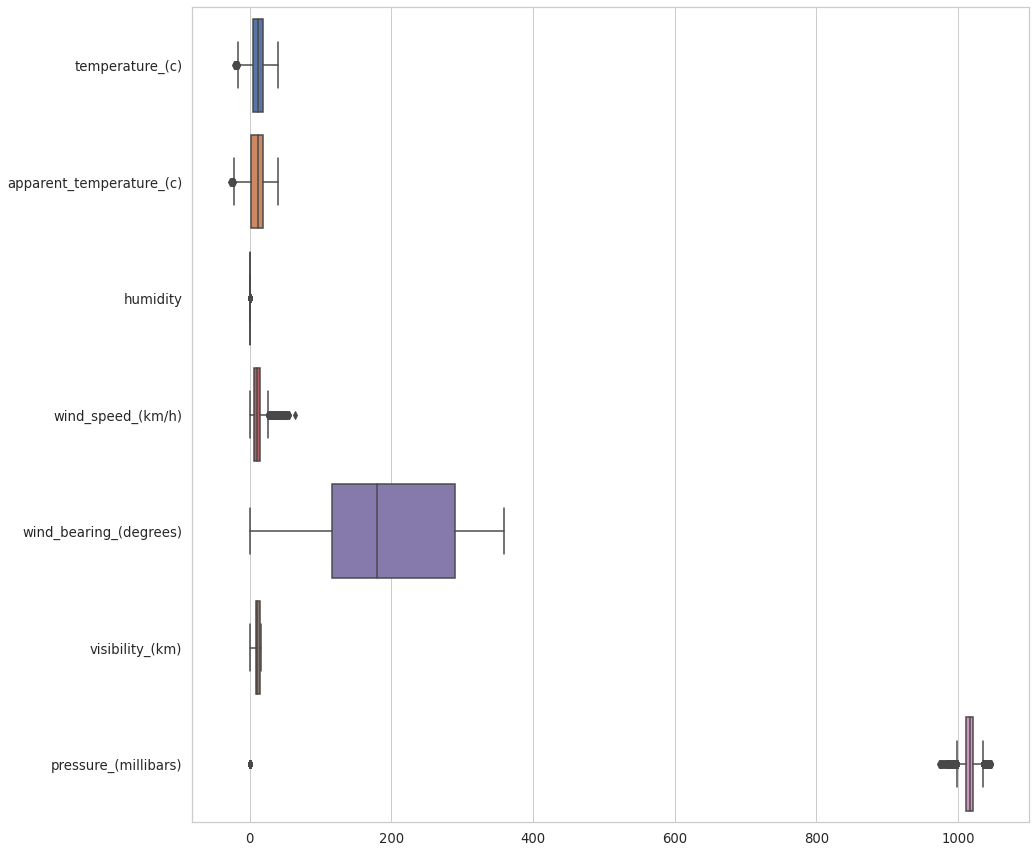

In [12]:
# Checking for data outliers

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
stats_df_without_outliers = new_df.drop(["summary", "precip_type"], axis=1)
sns.boxplot(data=stats_df_without_outliers, orient="h")

Before Shape: (95912, 9)
After Shape: (95890, 9)


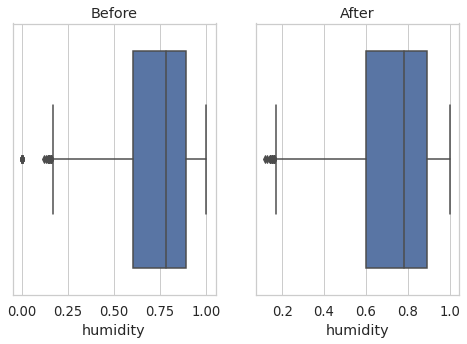

In [13]:
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1.2, style='whitegrid')
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)


# DataFrame
print("Before Shape:",new_df.shape)

# Removing 0 from column values
df_humid = new_df.loc[~(new_df['humidity'] == 0)]
## Visulization
print("After Shape:",df_humid.shape)

sns.boxplot(new_df["humidity"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_humid["humidity"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Before Shape: (95890, 9)
After Shape: (95889, 9)


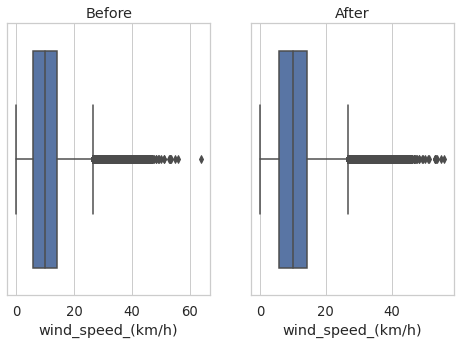

In [14]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)


# DataFrame
print("Before Shape:",df_humid.shape)

# Removing 0 from column values
df_wind_speed = df_humid.loc[(df_humid['wind_speed_(km/h)'] < 60)]

# Visulization
print("After Shape:",df_wind_speed.shape)

sns.boxplot(df_humid["wind_speed_(km/h)"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_wind_speed["wind_speed_(km/h)"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Before Shape: (95889, 9)
After Shape: (94601, 9)


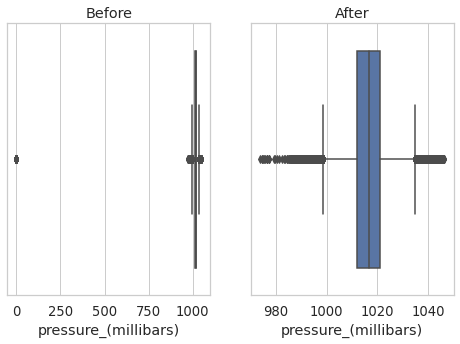

In [15]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)


# DataFrame
print("Before Shape:",df_wind_speed.shape)

# Removing 0 from column values
df_pressure = df_wind_speed.loc[~(df_wind_speed['pressure_(millibars)'] == 0)]

## Visulization
print("After Shape:",df_pressure.shape)

sns.boxplot(df_wind_speed["pressure_(millibars)"],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_pressure["pressure_(millibars)"],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
df2 = df_pressure

## Q-Q Plots and Histograms

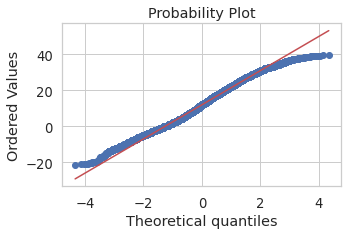

<AxesSubplot:>

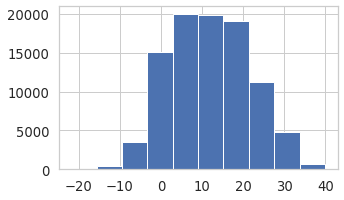

In [16]:
# Plot and histogram for temperature
sns.set(rc={'figure.figsize':(5,3)}, font_scale=1.2, style='whitegrid')
stats.probplot(df2["temperature_(c)"], dist="norm", plot=plt)
plt.show()
df2["temperature_(c)"].hist()

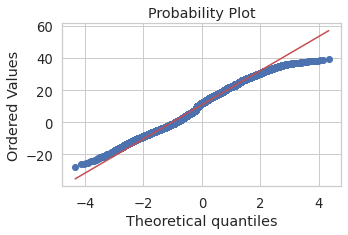

<AxesSubplot:>

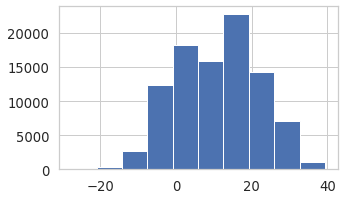

In [17]:
# Plot and histogram for apparent temperature
stats.probplot(df2["apparent_temperature_(c)"], dist="norm", plot=plt)
plt.show()
df2["apparent_temperature_(c)"].hist()

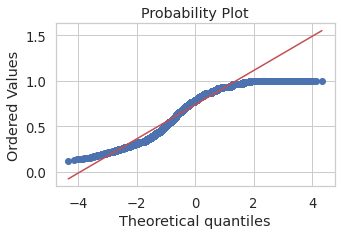

<AxesSubplot:>

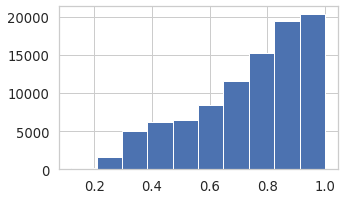

In [18]:
# Plot and histogram for humidity
stats.probplot(df2["humidity"], dist="norm", plot=plt)
plt.show()
df2["humidity"].hist()

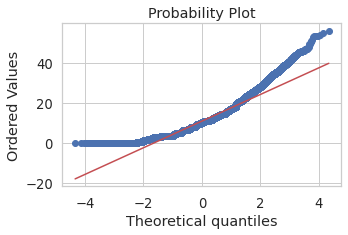

<AxesSubplot:>

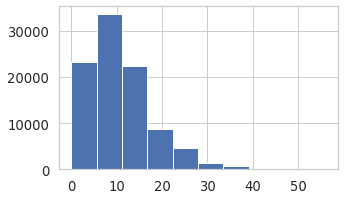

In [19]:
# Plot and histogram for wind speed(km/h)
stats.probplot(df2["wind_speed_(km/h)"], dist="norm", plot=plt)
plt.show()
df2["wind_speed_(km/h)"].hist()

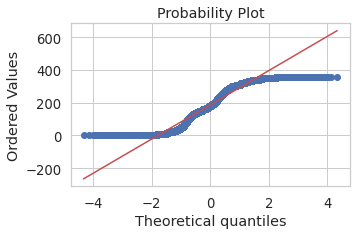

<AxesSubplot:>

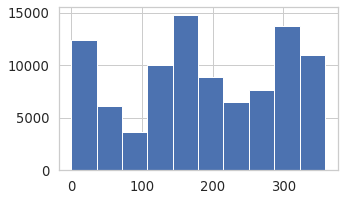

In [20]:
# Plot and histogram for wind bearing(degrees)
stats.probplot(df2["wind_bearing_(degrees)"], dist="norm", plot=plt)
plt.show()
df2["wind_bearing_(degrees)"].hist()

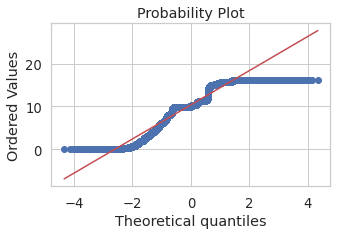

<AxesSubplot:>

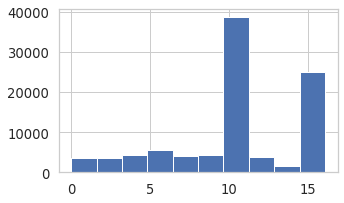

In [21]:
# Plot and histogram for visibility(km)
stats.probplot(df2["visibility_(km)"], dist="norm", plot=plt)
plt.show()
df2["visibility_(km)"].hist()

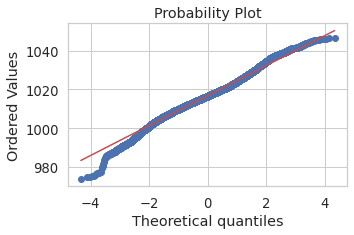

<AxesSubplot:>

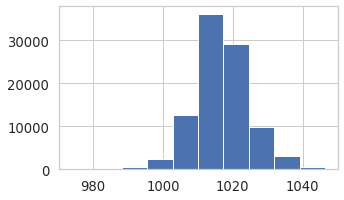

In [22]:
# Plot and histogram for pressure(millibars)
stats.probplot(df2["pressure_(millibars)"], dist="norm", plot=plt)
plt.show()
df2["pressure_(millibars)"].hist()

## Train - test split

In [23]:
# df_features represents the independent variables(features) while df_target represents the dependent variable(label)
df_features= df2.drop('precip_type', axis=1)
df_target = pd.DataFrame(df2['precip_type'], columns=["precip_type"])

In [24]:
# Mapping the categorical label with a numerical value

precip_values = {
   'rain':1,
   'snow':0
    
}

df_target.precip_type = df_target.precip_type.map(precip_values)

In [25]:
df_target.value_counts()

precip_type
1              84090
0              10511
dtype: int64

In [26]:
# Splitting the dataset into 80% train dataset and 20% test dataset

x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 101)
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


## Data Transformation - Handling skewness

[[<AxesSubplot:title={'center':'temperature_(c)'}>
  <AxesSubplot:title={'center':'apparent_temperature_(c)'}>
  <AxesSubplot:title={'center':'humidity'}>]
 [<AxesSubplot:title={'center':'wind_speed_(km/h)'}>
  <AxesSubplot:title={'center':'wind_bearing_(degrees)'}>
  <AxesSubplot:title={'center':'visibility_(km)'}>]
 [<AxesSubplot:title={'center':'pressure_(millibars)'}> <AxesSubplot:>
  <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'temperature_(c)'}>
  <AxesSubplot:title={'center':'apparent_temperature_(c)'}>
  <AxesSubplot:title={'center':'humidity'}>]
 [<AxesSubplot:title={'center':'wind_speed_(km/h)'}>
  <AxesSubplot:title={'center':'wind_bearing_(degrees)'}>
  <AxesSubplot:title={'center':'visibility_(km)'}>]
 [<AxesSubplot:title={'center':'pressure_(millibars)'}> <AxesSubplot:>
  <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'precip_type'}>]]
[[<AxesSubplot:title={'center':'precip_type'}>]]


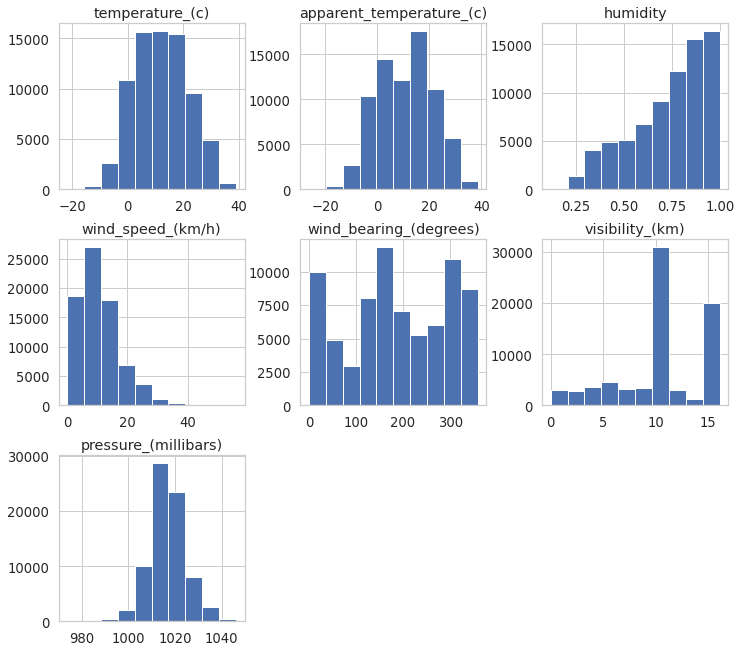

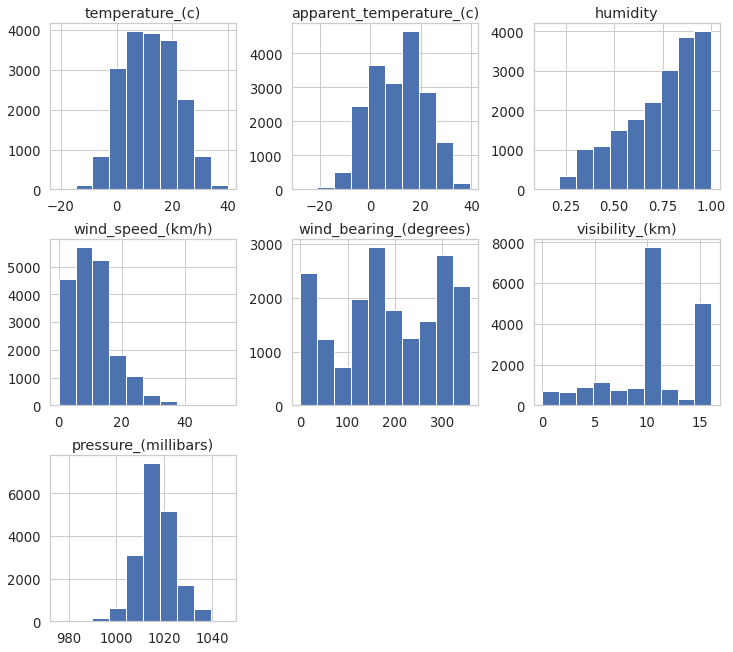

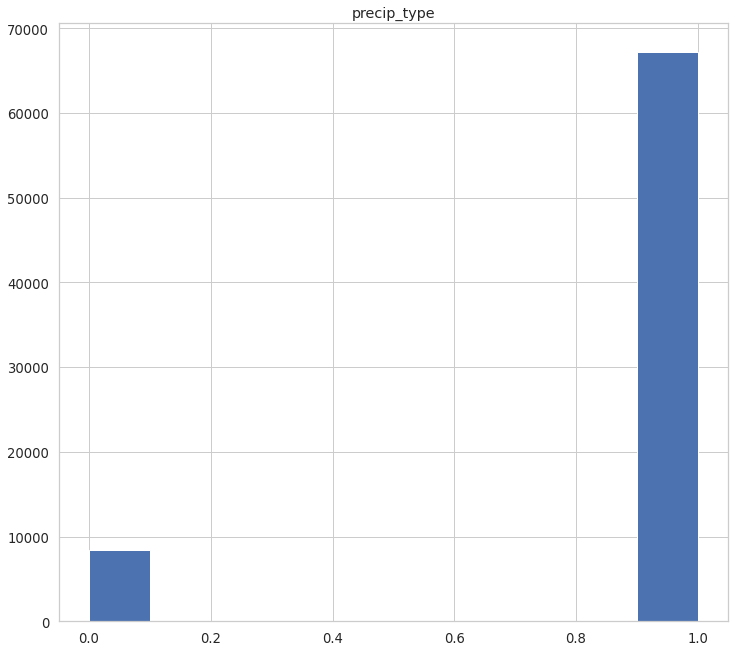

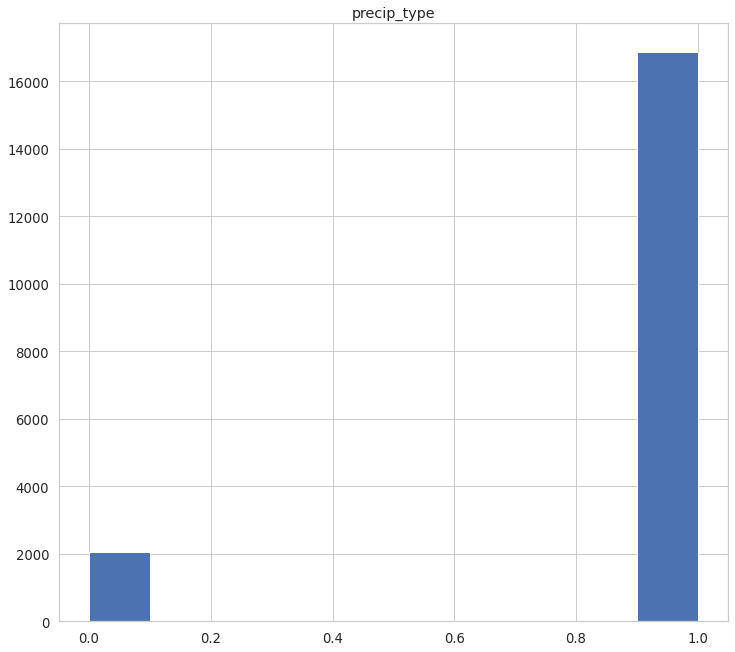

In [27]:
# Visualising the histogram of the training and testing datasets to observe data skewness
sns.set(rc={'figure.figsize':(12,11)}, font_scale=1.2, style='whitegrid')
print(x_train.hist())
print(x_test.hist())
print(y_train.hist())
print(y_test.hist())

In [28]:
# Transforming the left skewed data

# create columns variables to hold the columns that need transformation
columns = ['humidity']

# create the function transformer object with logarithm transformation
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)

# apply the transformation to your train data
data_new = exponential_transformer.transform(x_train[columns])
df_left_skewed = pd.DataFrame(data_new, columns=columns)
df_left_skewed = df_left_skewed.reset_index(drop=True)
x_train["humidity"] = df_left_skewed["humidity"]

# apply the transformation to your test data
data_new = exponential_transformer.transform(x_test[columns])
df_left_skewed = pd.DataFrame(data_new, columns=columns)
df_left_skewed = df_left_skewed.reset_index(drop=True)
x_test["humidity"] = df_left_skewed["humidity"]

In [29]:
#Transforming the right skewed data

# create columns variables to hold the columns that need transformation
columns = ['wind_speed_(km/h)']

# create the function transformer object with logarithm transformation
square_root_transformation = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your train data
data_new = square_root_transformation.transform(x_train[columns])
df_right_skewed = pd.DataFrame(data_new, columns=columns)
df_right_skewed = df_right_skewed.reset_index(drop=True)
x_train["wind_speed_(km/h)"] = df_right_skewed["wind_speed_(km/h)"]

# apply the transformation to your train data
data_new = square_root_transformation.transform(x_test[columns])
df_right_skewed = pd.DataFrame(data_new, columns=columns)
df_right_skewed = df_right_skewed.reset_index(drop=True)
x_test["wind_speed_(km/h)"] = df_right_skewed["wind_speed_(km/h)"]

## Feature coding technique

-One-hot Encoding-Representation of categorical variables as binary vectors.


In [30]:
# Transforming the categorical feature (summary) using onehot encoder

# creating instance of one-hot-encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# We fitting data
onehot_encoder.fit(x_train[['summary']])
column_names = onehot_encoder.get_feature_names(['summary'])

# transforming testing data
onehot_encoder_train_df = pd.DataFrame(onehot_encoder.transform(x_train[['summary']]).toarray(),columns=column_names)
onehot_encoder_test_df = pd.DataFrame(onehot_encoder.transform(x_test[['summary']]).toarray(),columns=column_names)

x_train = x_train.join(onehot_encoder_train_df)
x_test = x_test.join(onehot_encoder_test_df)
x_train.drop('summary', axis=1, inplace=True)
x_test.drop('summary', axis=1, inplace=True)

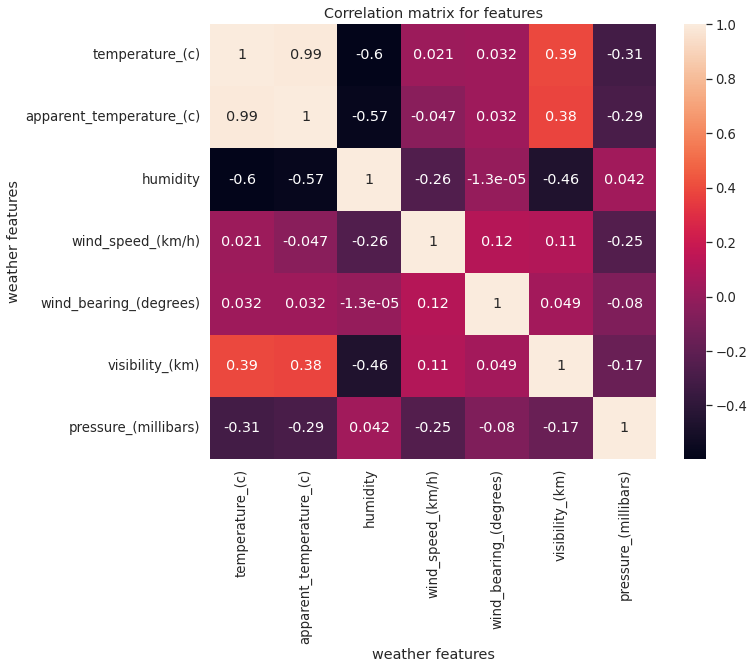

In [31]:
# correlation matrix without target
correlation_mat = x_train.iloc[:,:7].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix for features")
plt.xlabel("weather features")
plt.ylabel("weather features")
plt.show()

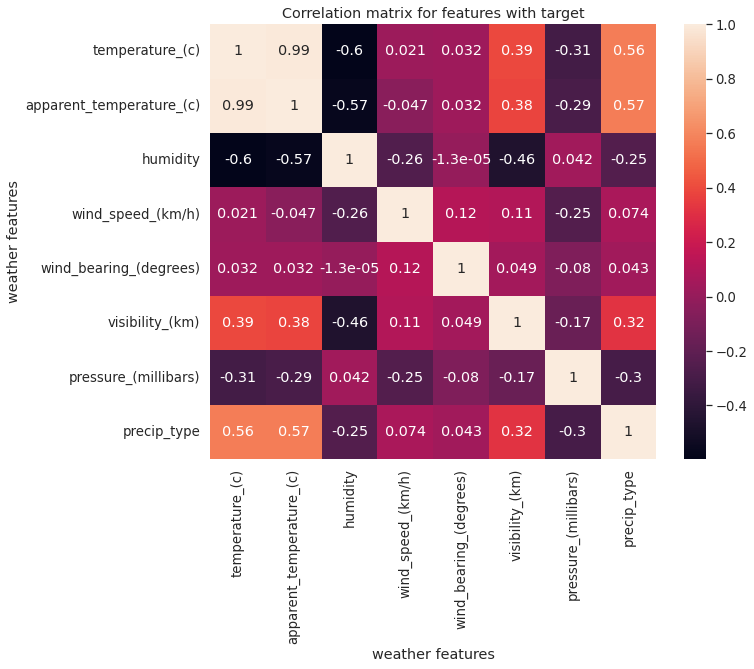

In [32]:
# correlation matrix with target
df_all = pd.concat([x_train.iloc[:,:7], y_train], axis=1)
correlation_mat = df_all.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix for features with target")
plt.xlabel("weather features")
plt.ylabel("weather features")
plt.show()

## Training models

In [33]:
# Using a Decision tree classifier to train the model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
# The predicted values
y_pred = dt.predict(x_test)

In [35]:
y_pred[1005]

1

In [36]:
# Checking the testing label to verify the predicted values
y_test.iloc[1000:]

,precip_type
1000,1
1001,0
1002,1
1003,1
1004,0
...,...
18916,1
18917,1
18918,1
18919,1


In [37]:
# Checking through the corresponding predictions to validate the testing data above
y_pred[1000:1004]

array([1, 0, 1, 1])

In [38]:
# Evaluating the score of the predictions
roc_auc_score(y_test,y_pred)

1.0

## Training data with the five AI Classifiers  

In [39]:
# training the dataset with the five classifiers



model1 = DecisionTreeClassifier(max_depth =3)

model2 = KNeighborsClassifier(n_neighbors=4)

model3 = RandomForestClassifier(n_estimators=10, random_state=1)

model4 = svm.SVC()

model5 = KMeans(2)


model1.fit(x_train, y_train)

model2.fit(x_train, y_train)

model3.fit(x_train, y_train)

model4.fit(x_train, y_train)

model5.fit(x_train,y_train)

pred_1 = model1.predict(x_test)
pred_2 = model2.predict(x_test)
pred_3 = model3.predict(x_test)
pred_4 = model4.predict(x_test)
pred_5 = model5.predict(x_test)

## Confusion Matrix

- Using roc_curve to generate the true positives rates and the false positive rates

In [40]:
# Generating a roc_curve
#fpr = false positive rate
#tpr = true posive rate
#thresh = threshold

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_2, pos_label=1)

fpr3, tpr3, thresh3 = roc_curve(y_test, pred_3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_4, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_5, pos_label=1)

random_probs = [0 for i in range((len(y_test)))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [41]:
# The auc_scores of the models

auc_score1 = roc_auc_score(y_test, pred_1)
auc_score2 = roc_auc_score(y_test, pred_2)
auc_score3 = roc_auc_score(y_test, pred_3)
auc_score4 = roc_auc_score(y_test, pred_4)
auc_score5 = roc_auc_score(y_test, pred_5)


#print(auc_score1, auc_score2, auc_score3, auc_score4)
print(" The auc score for Decision Tree Classifier: ", auc_score1.round(2))
print(" The auc score for KNeighbors Classifier: ", auc_score2.round(2))
print(" The auc score for Random Forest Classifier: ", auc_score3.round(2))
print(" The auc score for Support Vector Classifier: ",auc_score4.round(2))
print(" The auc score for KMeans Clustering: ",auc_score5.round(2))


 The auc score for Decision Tree Classifier:  1.0
 The auc score for KNeighbors Classifier:  0.96
 The auc score for Random Forest Classifier:  1.0
 The auc score for Support Vector Classifier:  0.76
 The auc score for KMeans Clustering:  0.48


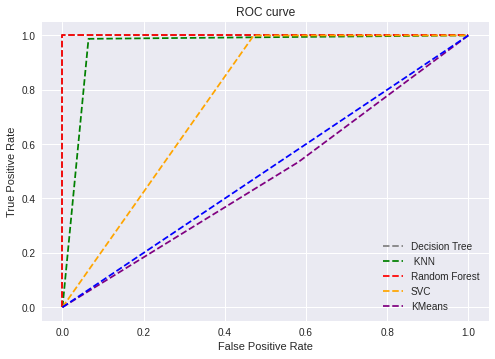

In [42]:
# The visualisation of the roc_curve

plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--', color = 'grey', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', color = 'green', label=' KNN ')
plt.plot(fpr3, tpr3, linestyle='--', color = 'red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--', color = 'orange', label='SVC')
plt.plot(fpr5, tpr5, linestyle='--', color = 'purple', label='KMeans')
plt.plot(p_fpr, p_tpr, linestyle='--', color = 'blue')

# title

plt.title('ROC curve')

# x label

plt.xlabel('False Positive Rate')

# y label 

plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show();

## Comparison of the auc_score between the five classifiers

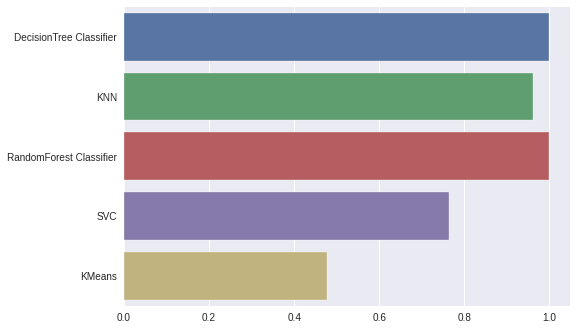

In [43]:
models = ['DecisionTree Classifier', 'KNN', 'RandomForest Classifier', 'SVC', 'KMeans']
auc_score = [auc_score1,auc_score2,auc_score3,auc_score4, auc_score5]

sns.barplot(x=auc_score,y=models)

plt.show()

plt.show()